In [1]:
import pandas as pd

In [2]:
url1='https://raw.githubusercontent.com/jdodway/F1Anlysis/main/F1QueryResults/F1QualyAllFastest.csv'
url2='https://raw.githubusercontent.com/jdodway/F1Anlysis/main/F1QueryResults/F1RaceFastestLap.csv'
url3='https://raw.githubusercontent.com/jdodway/F1Anlysis/main/F1QueryResults/F1RaceTimeline2012.csv'
url4='https://raw.githubusercontent.com/jdodway/F1Anlysis/main/F1QueryResults/F1Qual2012.csv'
url5='https://raw.githubusercontent.com/jdodway/F1Anlysis/main/F1QueryResults/f1driversnation.csv'

In [3]:
AllTimeFastQ = pd.read_csv(url1)
AllTimeFastR = pd.read_csv(url2)
Races2012 = pd.read_csv(url3)
Qual2012 = pd.read_csv(url4)
DriversNations = pd.read_csv(url5)

## First some cleaning

There are tables with "\N" where there is no data, so I will be replacing the cells with NaN's

In [5]:
import numpy as np

In [6]:
AllTimeFastQ[['q3','q2']] = AllTimeFastQ[['q3','q2']].replace(r'\N',np.nan) 
                                         
AllTimeFastQ

,year,circuitRef,circuitName,position,q1,q2,q3
0,1994,monza,Autodromo Nazionale di Monza,1,1:23.844,NaN,NaN
1,1994,spa,Circuit de Spa-Francorchamps,1,2:21.163,NaN,NaN
2,1994,silverstone,Silverstone Circuit,1,1:24.960,NaN,NaN
3,1995,monza,Autodromo Nazionale di Monza,1,1:24.462,NaN,NaN
4,1995,spa,Circuit de Spa-Francorchamps,1,1:54.392,NaN,NaN
...,...,...,...,...,...,...,...
78,2019,monza,Autodromo Nazionale di Monza,1,1:20.126,1:19.553,1:19.307
79,2020,silverstone,Silverstone Circuit,1,1:25.900,1:25.347,1:24.303
80,2020,silverstone,Silverstone Circuit,1,1:26.738,1:25.785,1:25.154
81,2020,spa,Circuit de Spa-Francorchamps,1,1:42.323,1:42.014,1:41.252


In [17]:
Qual2012[['q3']] = Qual2012[['q3']].replace(r'\N',np.nan) 
                                         
Qual2012

,raceId,year,name,forename,surname,q3,name.1,position
0,860,2012,Australian Grand Prix,Lewis,Hamilton,1:24.922,McLaren,1
1,860,2012,Australian Grand Prix,Jenson,Button,1:25.074,McLaren,2
2,860,2012,Australian Grand Prix,Romain,Grosjean,1:25.302,Lotus F1,3
3,860,2012,Australian Grand Prix,Michael,Schumacher,1:25.336,Mercedes,4
4,860,2012,Australian Grand Prix,Mark,Webber,1:25.651,Red Bull,5
...,...,...,...,...,...,...,...,...
471,879,2012,Brazilian Grand Prix,Heikki,Kovalainen,NaN,Caterham,20
472,879,2012,Brazilian Grand Prix,Timo,Glock,NaN,Marussia,21
473,879,2012,Brazilian Grand Prix,Charles,Pic,NaN,Marussia,22
474,879,2012,Brazilian Grand Prix,Narain,Karthikeyan,NaN,HRT,23


## Total count of every driver's nationality

In [10]:
DriversNations.rename({'count(code)':'Number of F1 Drivers','nationality':'Nationality'},axis='columns',inplace=True)

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.set(rc={'figure.figsize':(12,12)})
sns.barplot(y='Nationality', x='Number of F1 Drivers', data = DriversNations, color='b').set(title="Total Count of Every Driver's Nationality")

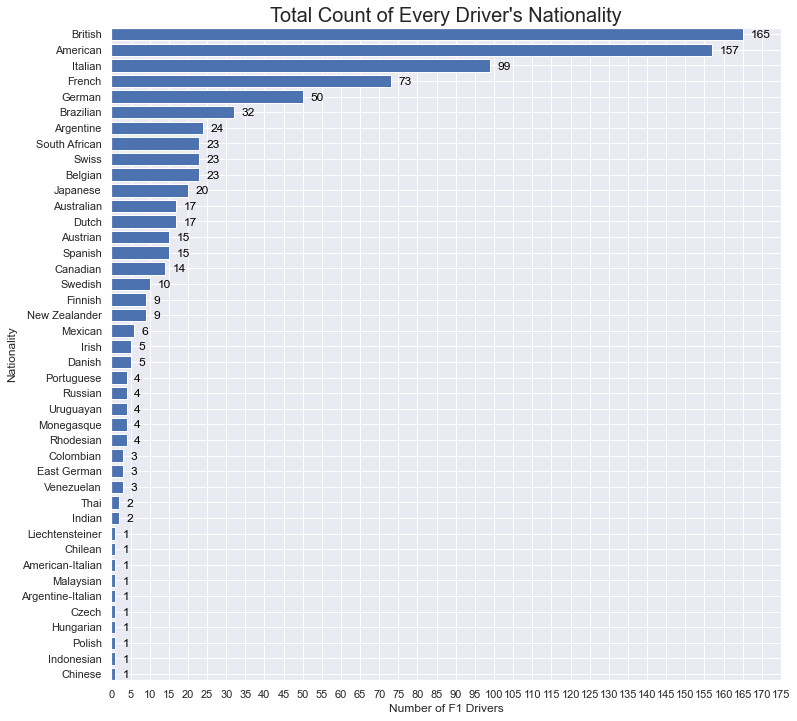

In [83]:
y = DriversNations['Nationality']
x = DriversNations['Number of F1 Drivers']
plt.barh(y, width=x)
plt.gca().invert_yaxis()
plt.margins(y=0)
plt.title("Total Count of Every Driver's Nationality", fontsize=20)
plt.xticks(np.arange(0,180,step=5))
plt.ylabel('Nationality')
plt.xlabel('Number of F1 Drivers')
for i, v in enumerate(DriversNations['Number of F1 Drivers']):
    plt.text(v+2, i+0.25, str(round(v, 2)), color='black')

plt.show()

## Scraping additional data for fastest lap for every GB, BE, and IT race

In [84]:
AllTimeFastR.head()

,year,circuitRef,circuitName,FastestLap
0,2004,monaco,Circuit de Monaco,01:14.4
1,2004,monza,Autodromo Nazionale di Monza,01:21.0
2,2004,spa,Circuit de Spa-Francorchamps,01:45.1
3,2004,silverstone,Silverstone Circuit,01:18.7
4,2005,monaco,Circuit de Monaco,01:15.8


In [13]:
from bs4 import BeautifulSoup as bs
import requests
import lxml

In [90]:
laptimes = pd.DataFrame(columns = ['Year','Track', 'FastestLap'])
def scrapefastlap():
    page = 1950
    global laptimes
    targettracks = ['Great Britain','Belgium', 'Italy','Monaco']
    while page != 2004:
        url = f'https://www.formula1.com/en/results.html/{page}/fastest-laps.html'
        response = requests.get(url)
        soup = bs(response.text,'lxml')
        table = soup.find('table',class_='resultsarchive-table')
        for row in table.tbody.find_all('tr'):
            rows = row.find_all('td')
            if any(x in row.find_all('td')[1].text for x in targettracks):
                track = rows[1].text
                fastlap = rows[4].text
                
                laptimes.loc[len(laptimes.index)] = [page,track, fastlap]
        page = page + 1



In [91]:
scrapefastlap()

In [92]:
laptimes

,Year,Track,FastestLap
0,1950,Great Britain,1:50.600
1,1950,Monaco,1:51.000
2,1950,Belgium,4:34.100
3,1950,Italy,2:00.000
4,1951,Belgium,4:22.100
...,...,...,...
202,2002,Belgium,1:47.176
203,2002,Italy,1:23.657
204,2003,Monaco,1:14.545
205,2003,Great Britain,1:22.236


In [97]:
AllTimeFastR.rename({'circuitRef':'Track','year':'Year'},axis='columns',inplace=True)

In [104]:
AllTimeFastR

,Year,Track,circuitName,FastestLap
0,2004,monaco,Circuit de Monaco,01:14.4
1,2004,monza,Autodromo Nazionale di Monza,01:21.0
2,2004,spa,Circuit de Spa-Francorchamps,01:45.1
3,2004,silverstone,Silverstone Circuit,01:18.7
4,2005,monaco,Circuit de Monaco,01:15.8
...,...,...,...,...
61,2019,spa,Circuit de Spa-Francorchamps,01:46.4
62,2019,monza,Autodromo Nazionale di Monza,01:21.8
63,2020,silverstone,Silverstone Circuit,01:27.1
64,2020,spa,Circuit de Spa-Francorchamps,01:47.5


In [105]:
RaceFastLaps = pd.concat([laptimes, AllTimeFastR.drop('circuitName',axis=1)])

In [108]:
RaceFastLaps

,Year,Track,FastestLap
0,1950,Great Britain,1:50.600
1,1950,Monaco,1:51.000
2,1950,Belgium,4:34.100
3,1950,Italy,2:00.000
4,1951,Belgium,4:22.100
...,...,...,...
61,2019,spa,01:46.4
62,2019,monza,01:21.8
63,2020,silverstone,01:27.1
64,2020,spa,01:47.5


In [117]:
RaceFastLaps [['Track']] = RaceFastLaps[['Track']].replace(['spa', 'monza', 'silverstone', 'monaco'], ['Belgium', 'Italy', 'Great Britain','Monaco'])

In [118]:
RaceFastLaps

,Year,Track,FastestLap
0,1950,Great Britain,1:50.600
1,1950,Monaco,1:51.000
2,1950,Belgium,4:34.100
3,1950,Italy,2:00.000
4,1951,Belgium,4:22.100
...,...,...,...
61,2019,Belgium,01:46.4
62,2019,Italy,01:21.8
63,2020,Great Britain,01:27.1
64,2020,Belgium,01:47.5
